# Application des modeles de machine learning sur le jeu de donnee Thomas

##  1) importation des librairies

In [ ]:
import pandas as pd
import numpy as np
SEED = 1221
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# import eli5
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
# import lightgbm as lgb
from sklearn.metrics import mean_squared_log_error
from sklearn import preprocessing
from sklearn.preprocessing  import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, cross_val_predict
import os

from sklearn.linear_model import LogisticRegression

## 2) importation du jeu de donnee et de la description du jeu de donnee

In [ ]:
data=pd.read_csv('thomas.csv',sep=';')
dataset=data
# description=pd.read_csv('description.csv')


## 3)visualisation des donnees et de la description

In [ ]:
data.sample(10)

,YOB,NKID,DEP,PHON,SINC,AES,DAINC,RES,DHVAL,DMORT,DOUTM,DOUTL,DOUTHP,DOUTCC,BAD
170,19.0,0.0,0.0,1,0.0,R,0.0,O,0.0,0.0,0.0,0.0,0.0,0.0,1.0
928,52.0,3.0,0.0,1,0.0,P,42000.0,O,8928.0,62464.0,912.0,0.0,0.0,0.0,0.0
199,51.0,0.0,0.0,1,0.0,V,9600.0,U,0.0,0.0,256.0,0.0,0.0,0.0,0.0
1050,58.0,0.0,0.0,1,0.0,P,42000.0,O,36464.0,30464.0,712.0,280.0,120.0,0.0,0.0
1060,47.0,2.0,0.0,1,0.0,V,36000.0,O,28928.0,0.0,0.0,756.0,0.0,80.0,0.0
355,32.0,1.0,0.0,1,3000.0,P,18464.0,O,27392.0,52000.0,376.0,580.0,0.0,160.0,0.0
1096,53.0,3.0,0.0,1,0.0,P,42000.0,O,8928.0,34464.0,720.0,360.0,0.0,80.0,0.0
999,43.0,2.0,0.0,1,0.0,V,21942.0,O,0.0,0.0,0.0,0.0,0.0,0.0,0.0
454,50.0,0.0,0.0,1,7000.0,V,36000.0,O,3392.0,40000.0,400.0,0.0,0.0,0.0,0.0
1104,64.0,0.0,0.0,1,0.0,V,20400.0,U,0.0,0.0,192.0,0.0,0.0,0.0,0.0


In [ ]:
pd.options.display.max_columns = None # Show all cols
data.describe()

,YOB,NKID,DEP,PHON,SINC,DAINC,DHVAL,DMORT,DOUTM,DOUTL,DOUTHP,DOUTCC,BAD
count,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000
mean,51.037551,0.623673,0.038367,0.903673,1990.084898,21244.211429,15693.857959,11225.691429,342.004898,121.926531,28.721633,39.595102,0.263673
std,15.301818,1.016013,0.219917,0.295159,4802.341425,15896.207986,20736.331833,18889.207107,427.993865,839.639588,119.324084,168.697101,0.440804
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,0.000000,1.000000,0.000000,9000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,0.000000,1.000000,0.000000,19500.000000,0.000000,0.000000,256.000000,0.000000,0.000000,0.000000,0.000000
75%,63.000000,1.000000,0.000000,1.000000,1040.000000,30600.000000,28928.000000,20000.000000,528.000000,0.000000,0.000000,0.000000,1.000000
max,99.000000,5.000000,2.000000,1.000000,50000.000000,64800.000000,64928.000000,64000.000000,3800.000000,28000.000000,1600.000000,2800.000000,1.000000


In [ ]:
#visualisation des valeurs manquantes
df_na = (data.isnull().sum() / len(data)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head(10)

,Missing Ratio


nous remarquons que nous n'avons aucune valeur manquante dans notre jeu de donnee neamoins nous devons verifier la presence de valeurs abherentes

In [ ]:
target=data['BAD']
cible='BAD'

<Axes: >

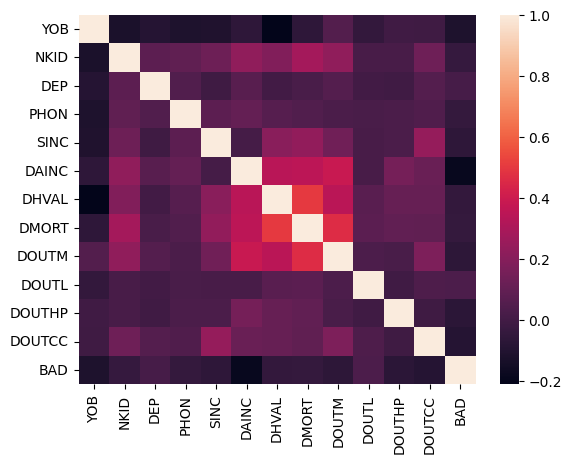

In [ ]:
#correlation entre les variables
sns.heatmap(data.corr())

In [ ]:
positive_df = data[data[cible] == 0]
negative_df = data[data[cible] == 1]

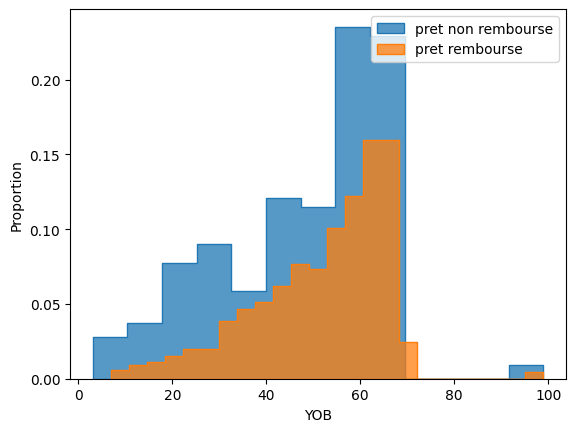

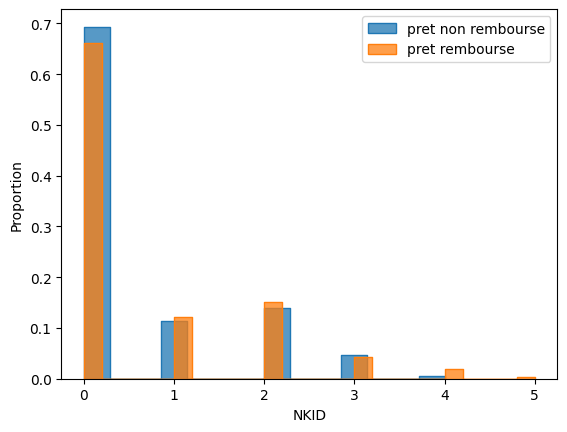

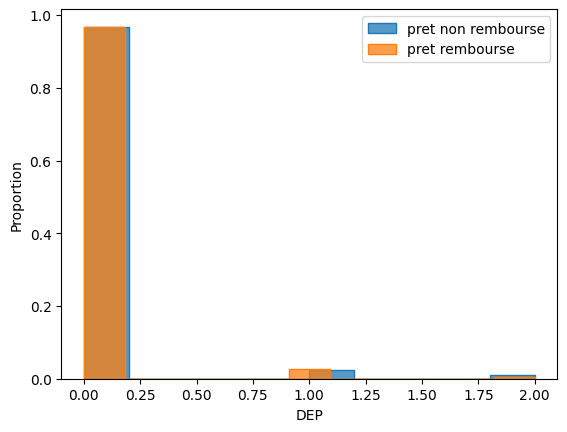

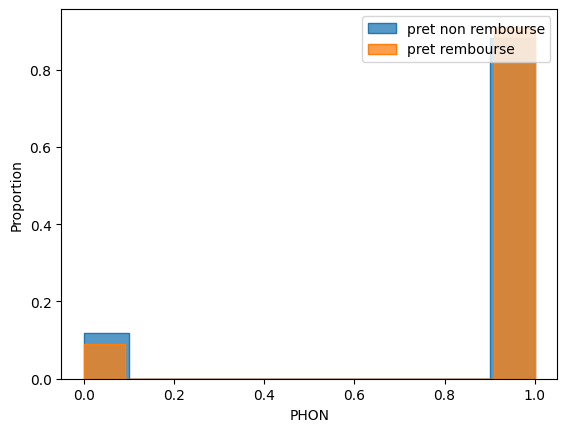

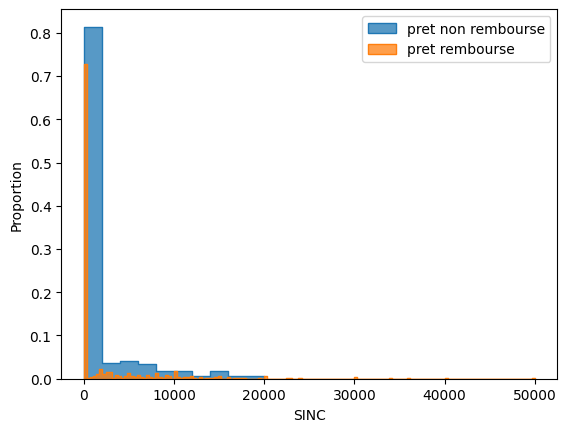

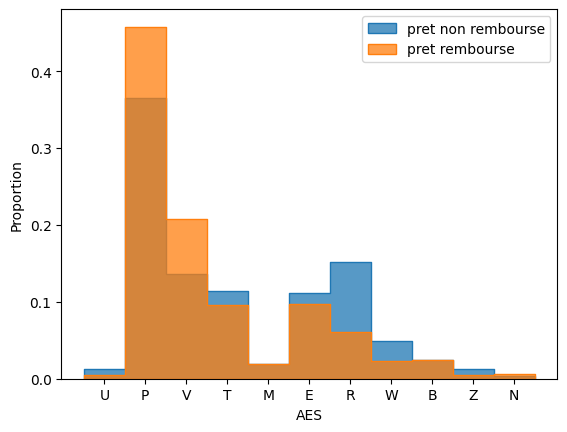

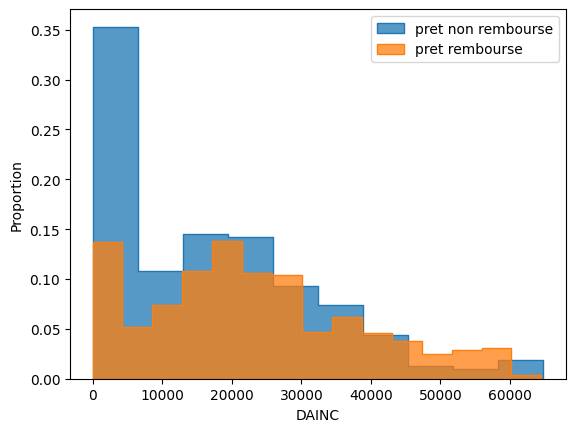

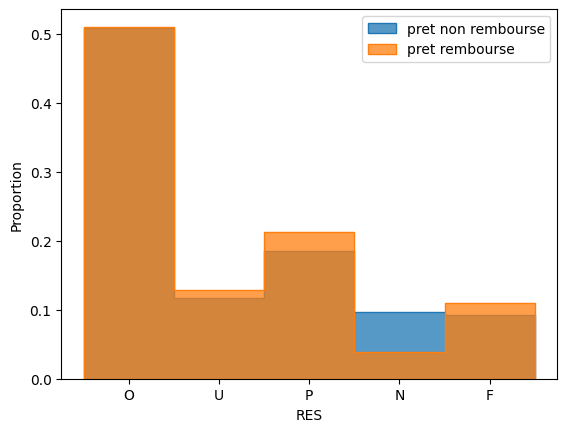

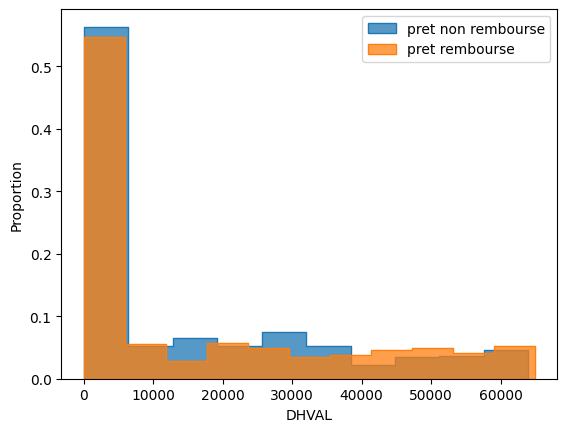

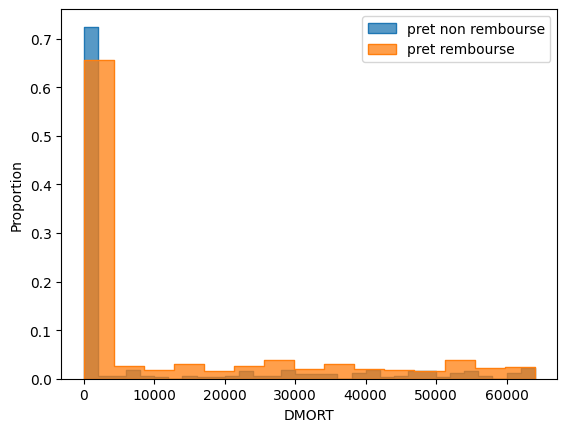

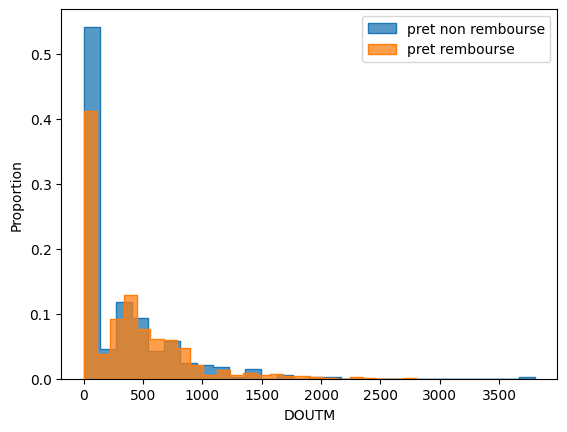

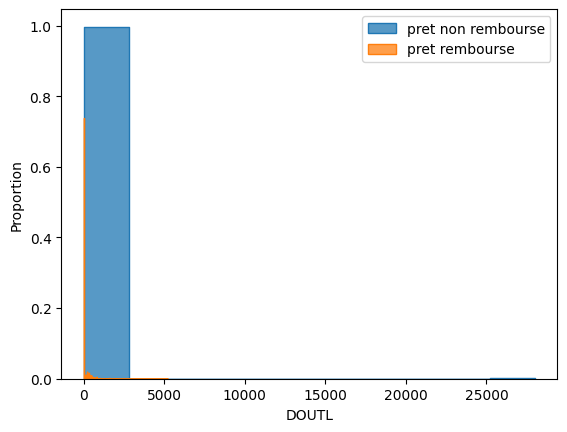

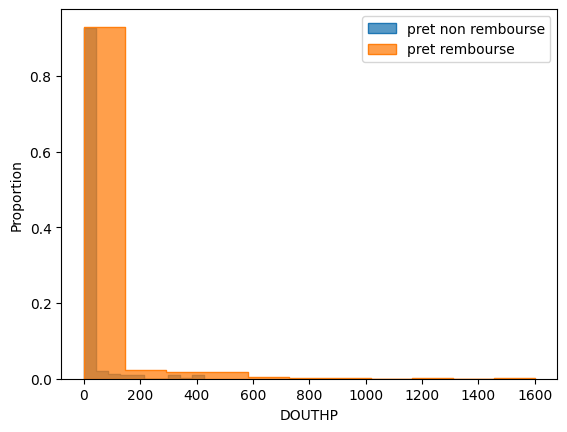

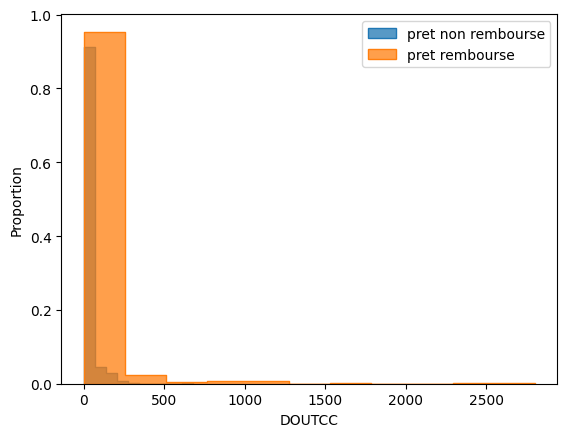

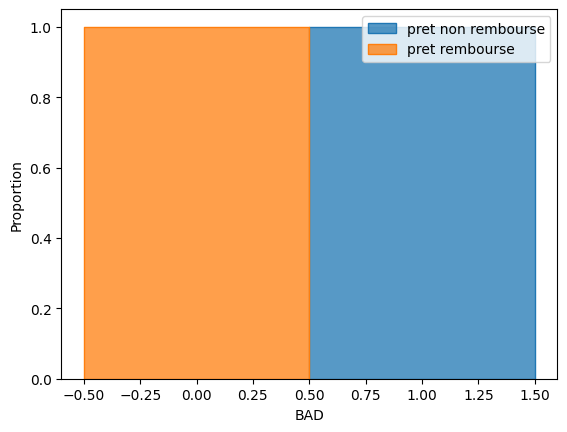

In [ ]:
for col in positive_df.columns:
  plt.figure()
  sns.histplot(negative_df[col], label = 'pret non rembourse', stat = 'proportion', element = 'step')
  sns.histplot(positive_df[col], label = 'pret rembourse',stat = 'proportion', element = 'step')
  plt.legend()


## 2) pretraitement

In [ ]:
numerical_data=dataset.select_dtypes(['float','int'])
numerical_data=numerical_data.drop(["BAD","PHON"],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
le=LabelEncoder()
data["AES"]=le.fit_transform(data.AES)
data["RES"]=le.fit_transform(data.RES)
data

,YOB,NKID,DEP,PHON,SINC,AES,DAINC,RES,DHVAL,DMORT,DOUTM,DOUTL,DOUTHP,DOUTCC,BAD
0,19.0,4.0,0.0,1,0.0,5,0.0,2,14464.0,4.0,0.0,0.0,0.0,0.0,0.0
1,41.0,2.0,0.0,1,0.0,4,36000.0,2,0.0,0.0,280.0,664.0,0.0,80.0,0.0
2,66.0,0.0,0.0,1,0.0,3,30000.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,51.0,2.0,0.0,1,0.0,4,464.0,2,24928.0,8464.0,584.0,320.0,0.0,60.0,0.0
4,65.0,0.0,0.0,1,0.0,4,15000.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,52.0,4.0,1.0,1,0.0,8,37764.0,4,0.0,0.0,0.0,340.0,0.0,0.0,0.0
1221,56.0,3.0,0.0,1,1200.0,4,31500.0,2,6928.0,46464.0,784.0,256.0,0.0,0.0,1.0
1222,60.0,0.0,0.0,1,0.0,1,46800.0,2,11392.0,928.0,1144.0,680.0,0.0,108.0,0.0
1223,20.0,0.0,0.0,1,0.0,5,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:

for col in numerical_data.columns:
  means=np.mean(data[col],axis=0)
  stds=np.std(data[col],axis=0)
  data[col]=(data[col]-means)/stds
data
# print(normalized)

,YOB,NKID,DEP,PHON,SINC,AES,DAINC,RES,DHVAL,DMORT,DOUTM,DOUTL,DOUTHP,DOUTCC,BAD
0,-2.094564,3.324471,-0.174534,1,-0.414568,5,-1.336978,2,-0.059334,-0.594322,-0.799415,-0.145272,-0.240801,-0.234807,0.0
1,-0.656239,1.355188,-0.174534,1,-0.414568,4,0.928638,2,-0.757138,-0.594534,-0.144933,0.645866,-0.240801,0.239609,0.0
2,0.978221,-0.614095,-0.174534,1,-0.414568,3,0.551035,1,-0.757138,-0.594534,-0.799415,-0.145272,-0.240801,-0.234807,0.0
3,-0.002455,1.355188,-0.174534,1,-0.414568,4,-1.307777,2,0.445494,-0.146264,0.565648,0.235999,-0.240801,0.121005,0.0
4,0.912843,-0.614095,-0.174534,1,-0.414568,4,-0.392972,3,-0.757138,-0.594534,-0.799415,-0.145272,-0.240801,-0.234807,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,0.062923,3.324471,4.374499,1,-0.414568,8,1.039653,4,-0.757138,-0.594534,-0.799415,0.259829,-0.240801,-0.234807,0.0
1221,0.324437,2.339830,-0.174534,1,-0.164588,4,0.645436,2,-0.422902,1.866288,1.033135,0.159745,-0.240801,-0.234807,1.0
1222,0.585951,-0.614095,-0.174534,1,-0.414568,1,1.608322,2,-0.207540,-0.545385,1.874612,0.664930,-0.240801,0.405655,0.0
1223,-2.029185,-0.614095,-0.174534,1,-0.414568,5,-1.336978,1,-0.757138,-0.594534,-0.799415,-0.145272,-0.240801,-0.234807,1.0


# 3)entrainement des modeles

In [ ]:
#importation des bibliotheque
from sklearn.model_selection import train_test_split
#ici
train, test = train_test_split(data, test_size = 0.2, random_state=42)

In [ ]:
train

,YOB,NKID,DEP,PHON,SINC,AES,DAINC,RES,DHVAL,DMORT,DOUTM,DOUTL,DOUTHP,DOUTCC,BAD
371,-0.263969,1.355188,-0.174534,1,-0.414568,0,-0.015369,2,1.024425,2.159485,0.079461,-0.145272,-0.240801,-0.234807,1.0
306,1.174356,-0.614095,-0.174534,1,-0.414568,8,-0.770574,3,-0.757138,-0.594534,-0.799415,-0.145272,-0.240801,-0.234807,1.0
1096,0.128302,2.339830,-0.174534,1,-0.414568,4,1.306240,2,-0.326414,1.230745,0.883539,0.283658,-0.240801,0.239609,0.0
10,-0.198590,1.355188,-0.174534,1,-0.414568,1,0.551035,2,1.098528,0.658757,0.603047,-0.145272,4.152394,-0.234807,0.0
535,-1.636915,-0.614095,-0.174534,1,-0.414568,5,-0.676174,4,-0.757138,-0.594534,0.060762,-0.145272,-0.240801,-0.234807,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,0.912843,-0.614095,-0.174534,1,-0.414568,8,-0.739422,1,-0.757138,-0.594534,-0.799415,-0.145272,-0.240801,-0.234807,0.0
1095,0.585951,-0.614095,-0.174534,1,-0.414568,8,0.079032,2,0.326620,0.595202,0.603047,-0.145272,-0.240801,-0.234807,1.0
1130,0.193680,1.355188,-0.174534,1,0.210382,8,1.721603,2,1.484482,1.018897,0.659146,0.169277,-0.240801,-0.234807,0.0
860,1.174356,-0.614095,-0.174534,0,-0.414568,6,-1.336978,0,-0.757138,-0.594534,0.416052,-0.145272,-0.240801,-0.234807,1.0


In [ ]:
#division de notre jeu en donnees et en classe

x_train = train.iloc[:,:-1]
x_test = test.iloc[:,:-1]
y_train = train.BAD
y_test = test.BAD
x_train

,YOB,NKID,DEP,PHON,SINC,AES,DAINC,RES,DHVAL,DMORT,DOUTM,DOUTL,DOUTHP,DOUTCC
371,-0.263969,1.355188,-0.174534,1,-0.414568,0,-0.015369,2,1.024425,2.159485,0.079461,-0.145272,-0.240801,-0.234807
306,1.174356,-0.614095,-0.174534,1,-0.414568,8,-0.770574,3,-0.757138,-0.594534,-0.799415,-0.145272,-0.240801,-0.234807
1096,0.128302,2.339830,-0.174534,1,-0.414568,4,1.306240,2,-0.326414,1.230745,0.883539,0.283658,-0.240801,0.239609
10,-0.198590,1.355188,-0.174534,1,-0.414568,1,0.551035,2,1.098528,0.658757,0.603047,-0.145272,4.152394,-0.234807
535,-1.636915,-0.614095,-0.174534,1,-0.414568,5,-0.676174,4,-0.757138,-0.594534,0.060762,-0.145272,-0.240801,-0.234807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,0.912843,-0.614095,-0.174534,1,-0.414568,8,-0.739422,1,-0.757138,-0.594534,-0.799415,-0.145272,-0.240801,-0.234807
1095,0.585951,-0.614095,-0.174534,1,-0.414568,8,0.079032,2,0.326620,0.595202,0.603047,-0.145272,-0.240801,-0.234807
1130,0.193680,1.355188,-0.174534,1,0.210382,8,1.721603,2,1.484482,1.018897,0.659146,0.169277,-0.240801,-0.234807
860,1.174356,-0.614095,-0.174534,0,-0.414568,6,-1.336978,0,-0.757138,-0.594534,0.416052,-0.145272,-0.240801,-0.234807


In [ ]:
#Modele des svm
from sklearn import svm

model_svm = svm.SVC(C=3.0, kernel='rbf')
model_svm.fit(x_train, y_train)

SVC(C=3.0)

In [ ]:
from sklearn.model_selection import cross_val_score
model_svm_acc = cross_val_score(estimator=model_svm, X=x_train, y=y_train, cv=5, n_jobs=-1)
model_svm_acc

array([0.73469388, 0.73469388, 0.72959184, 0.72959184, 0.73469388])

In [ ]:
from sklearn.metrics import f1_score
model_svm.predict(x_test[:10])
y_pred_svm = model_svm.predict(x_test)

matrice de confusion avec le svm:


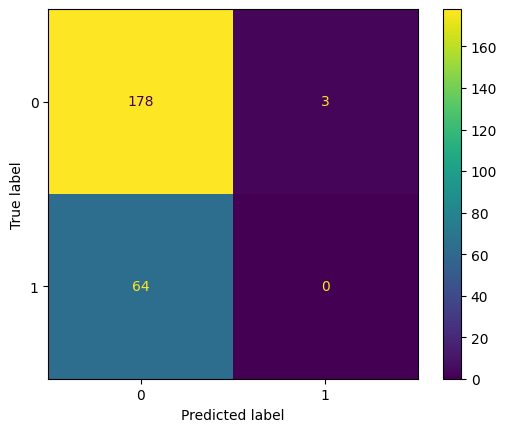

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print("matrice de confusion avec le svm:")
cm = confusion_matrix(y_test, y_pred_svm)

cm_display = ConfusionMatrixDisplay(cm).plot()


#IMPLEMTATION D'UN ARBRE DE Decision

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dec = DecisionTreeClassifier(max_depth=10, random_state=0)
model_dec.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [ ]:
model_dec_acc = cross_val_score(estimator=model_dec, X=x_train, y=y_train, cv=5, n_jobs=-1)
model_dec_acc
model_dec_pred=model_dec.predict(x_test)

matrice de confusion avec le model d'arbre de decision:


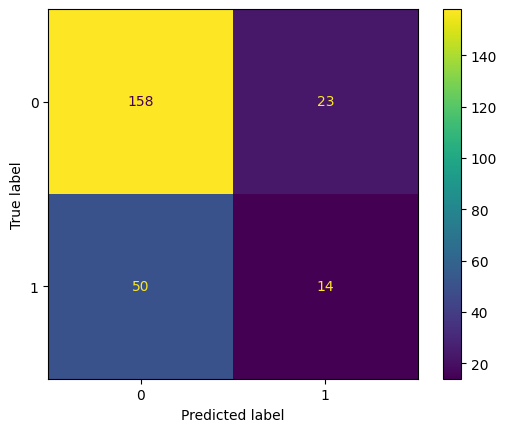

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print("matrice de confusion avec le model d'arbre de decision:")
cm = confusion_matrix(y_test, model_dec_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()



IMPLEMENTATION DE LA REGRESSION LOGISTIQUE

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lg = LogisticRegression()
model_lg.fit(x_train, y_train)
model_lg_acc_pred=model_lg.predict(x_test)

In [ ]:
model_lg_acc = cross_val_score(estimator=model_lg, X=x_train, y=y_train, cv=5, n_jobs=-1)
model_lg_acc

array([0.75      , 0.7244898 , 0.71428571, 0.74489796, 0.73469388])

matrice de confusion avec le model de regression logistique:


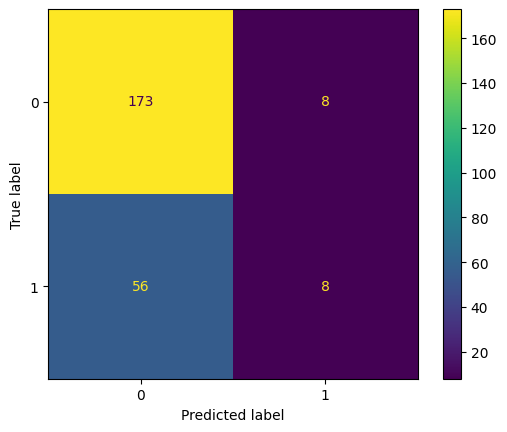

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print("matrice de confusion avec le model de regression logistique:")
cm = confusion_matrix(y_test, model_lg_acc_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()


#Implementation de XGBOOST

In [ ]:
pip install XGboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from xgboost import XGBClassifier
model_XG=XGBClassifier()
model_XG.fit(x_train, y_train)
model_XG_pred=model_XG.predict(x_test)

In [ ]:
model_XG_acc = cross_val_score(estimator=model_XG, X=x_train, y=y_train, cv=5, n_jobs=-1)
model_XG_acc

array([0.71938776, 0.69897959, 0.69897959, 0.70918367, 0.68877551])

matrice de confusion avec le model XGBOOST:
              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       181
         1.0       0.41      0.27      0.32        64

    accuracy                           0.71       245
   macro avg       0.59      0.57      0.57       245
weighted avg       0.68      0.71      0.69       245



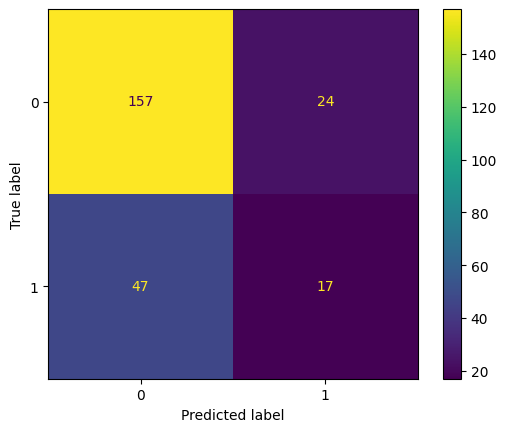

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print("matrice de confusion avec le model XGBOOST:")
cm = confusion_matrix(y_test, model_XG_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test,model_XG_pred))

#implementation de random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100,  bootstrap = True,max_features = 'sqrt')
# Fit on training data
model.fit(x_train, y_train)
model_rb=model.predict(x_test)

matrice de confusion avec le model random forest :


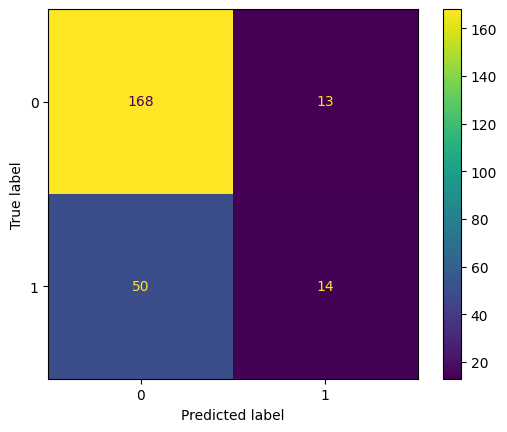

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print("matrice de confusion avec le model random forest :")
cm = confusion_matrix(y_test, model_rb)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:

print(" les metriques pour l'arbre de decision  :")
print( classification_report(y_test,model_dec_pred))




 les metriques pour l'arbre de decision  :
              precision    recall  f1-score   support

         0.0       0.76      0.87      0.81       181
         1.0       0.38      0.22      0.28        64

    accuracy                           0.70       245
   macro avg       0.57      0.55      0.54       245
weighted avg       0.66      0.70      0.67       245



In [ ]:
print(" les metriques pour  random forest  est de :")
print( classification_report(y_test,model_rb))

 les metriques pour  random forest  est de :
              precision    recall  f1-score   support

         0.0       0.77      0.93      0.84       181
         1.0       0.52      0.22      0.31        64

    accuracy                           0.74       245
   macro avg       0.64      0.57      0.57       245
weighted avg       0.70      0.74      0.70       245



In [ ]:
print(" les metriques pour  la regression logistique est de :")
print( classification_report(y_test,model_lg_acc_pred))


 les metriques pour  la regression logistique est de :
              precision    recall  f1-score   support

         0.0       0.76      0.96      0.84       181
         1.0       0.50      0.12      0.20        64

    accuracy                           0.74       245
   macro avg       0.63      0.54      0.52       245
weighted avg       0.69      0.74      0.68       245



In [ ]:
print(" les metriques pour de XGBOOST est de :")
print( classification_report(y_test,model_XG_pred))

 les metriques pour de XGBOOST est de :
              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       181
         1.0       0.41      0.27      0.32        64

    accuracy                           0.71       245
   macro avg       0.59      0.57      0.57       245
weighted avg       0.68      0.71      0.69       245



In [ ]:
print(" les metriques pour le svm est de :")
print( classification_report(y_test,y_pred_svm))

 les metriques pour le svm est de :
              precision    recall  f1-score   support

         0.0       0.74      0.98      0.84       181
         1.0       0.00      0.00      0.00        64

    accuracy                           0.73       245
   macro avg       0.37      0.49      0.42       245
weighted avg       0.54      0.73      0.62       245



#optimisation des modeles

# optimisation des arbres de decision

In [ ]:
dtclf = DecisionTreeClassifier(random_state=42)
# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'max_depth':[2,3,4,5,7,6,7,8,20],
                        'min_samples_leaf':[1,2,4,7,10,20,30],
                        'min_samples_split':[1,2,3,7,10]}

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(dtclf, param_grid=hyperparameter_space,
                  scoring="accuracy",
                  n_jobs=-1, cv=10, return_train_score=True)

gs.fit(x_train, y_train)
print("Optimal hyperparameter combination:", gs.best_params_)
print()
print("Mean cross-validated training accuracy score:", gs.best_score_)
gs.best_estimator_.fit(x_train, y_train)
y_pred = gs.best_estimator_.predict(x_test) # Predictions
y_true = y_test # True values


Optimal hyperparameter combination: {'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 2}

Mean cross-validated training accuracy score: 0.746938775510204


matrice de confusion avec le model random forest :


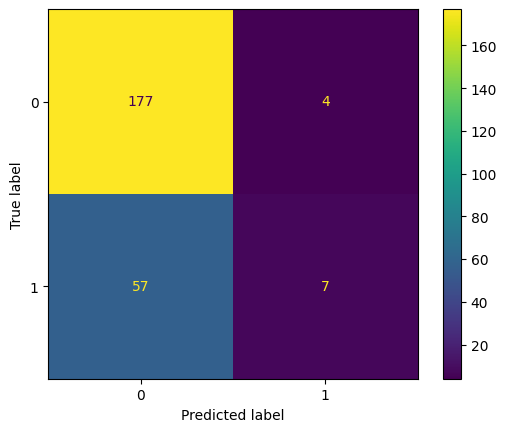

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print("matrice de confusion avec le model random forest :")
cm = confusion_matrix(y_true, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

# optimisation du model des svm

In [ ]:
# Defining 3-dimensional hyperparameter space as a Python dictionary
from sklearn import svm
from sklearn.model_selection import GridSearchCV

svm = svm.SVC()

hyperparameter_space = {'C': [0.1,1,10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel':['rbf']}

svm= GridSearchCV(svm, param_grid=hyperparameter_space,scoring="accuracy",n_jobs=-1, cv=10, return_train_score=True)

svm.fit(x_train, y_train)
print("Optimal hyperparameter combination:", svm.best_params_)
print()
print("Mean cross-validated training accuracy score:", svm.best_score_)
svm.best_estimator_.fit(x_train, y_train)
y_pred = svm.best_estimator_.predict(x_test) # Predictions
y_true = y_test # True values


Optimal hyperparameter combination: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

Mean cross-validated training accuracy score: 0.7418367346938776


In [ ]:
print(" les metriques pour  random forest optimisee  est de :")
print( classification_report(y_true,y_pred))

 les metriques pour  random forest optimisee  est de :
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86       181
         1.0       1.00      0.06      0.12        64

    accuracy                           0.76       245
   macro avg       0.88      0.53      0.49       245
weighted avg       0.82      0.76      0.66       245



matrice de confusion avec le svm:


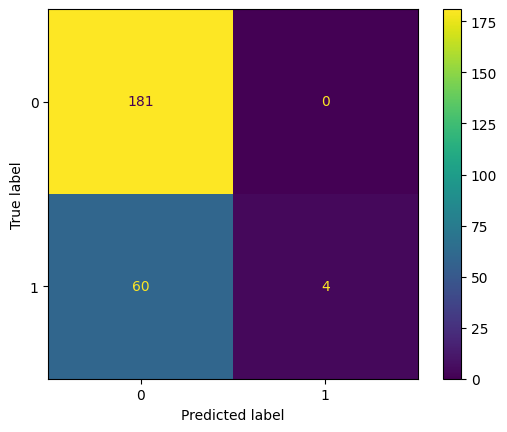

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print("matrice de confusion avec le svm:")
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

# optimisation de la regression logistique

In [ ]:
# Defining 3-dimensional hyperparameter space as a Python dictionary
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# model_lg = LogisticRegression()

# hyperparameter_space = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

# model_lg= GridSearchCV(model_lg, param_grid=hyperparameter_space,scoring="accuracy",n_jobs=-1, cv=10, return_train_score=True)

# model_lg.fit(x_train, y_train)
# # print("Optimal hyperparameter combination:", model_lg.best_params_)
# print()
# print("Mean cross-validated training accuracy score:", model_lg.best_score)
# model_lg.best_estimator_.fit(x_train, y_train)
# y_pred = model_lg.best_estimator_.predict(x_test) # Predictions
# y_true = y_test # True values



In [ ]:
print(" les metriques pour  la regression logistique optimisee  est de :")
print( classification_report(y_true,y_pred))

 les metriques pour  random forest optimisee  est de :
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86       181
         1.0       1.00      0.06      0.12        64

    accuracy                           0.76       245
   macro avg       0.88      0.53      0.49       245
weighted avg       0.82      0.76      0.66       245



matrice de confusion avec le regression logistique:


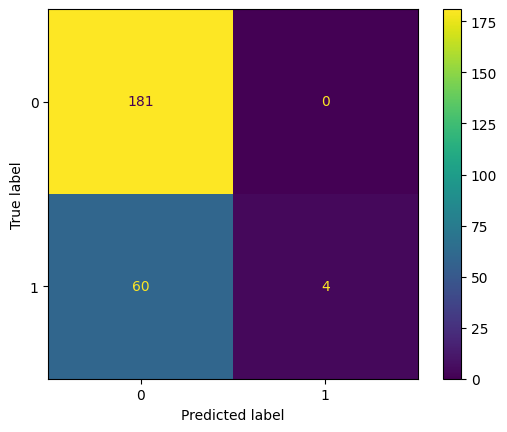

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print("matrice de confusion avec le regression logistique:")
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

# optimisation de random forest

In [ ]:
# help(XGBClassifier)

# optimisation de Xgboost

In [ ]:
hyperparameter_space ={'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}

from xgboost import XGBClassifier
model_XG=XGBClassifier()
clf = GridSearchCV(model_XG, hyperparameter_space, n_jobs=5, cv=2,  scoring='roc_auc', verbose=2, refit=True)
clf.fit(x_train, y_train)
print("Optimal hyperparameter combination:", clf.best_params_)
print()
print("Mean cross-validated training accuracy score:", clf.best_score_)
clf.best_estimator_.fit(x_train, y_train)
y_pred = clf.best_estimator_.predict(x_test) # Predictions
y_true = y_test # True values


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[17:30:19] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Optimal hyperparameter combination: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 5, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}

Mean cross-validated training accuracy score: 0.6049481266700474
[17:30:19] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [ ]:
print(" les metriques pour  xgboost optimisee  est de :")
print( classification_report(y_true,y_pred))

 les metriques pour  xgboost optimisee  est de :
              precision    recall  f1-score   support

         0.0       0.76      0.97      0.85       181
         1.0       0.58      0.11      0.18        64

    accuracy                           0.75       245
   macro avg       0.67      0.54      0.52       245
weighted avg       0.71      0.75      0.68       245



matrice de confusion avec xgboost:


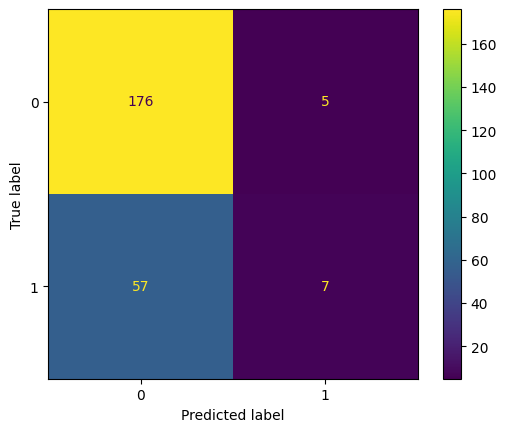

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print("matrice de confusion avec xgboost:")
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

# 1- intepretation des modeles

In [ ]:
pip install shap

In [ ]:
#importation de shap
import shap
#extentiation d'un ensemble de donnee
X,y=x_train,y_train
x100=shap.utils.sample(X,100)



#model des svm

In [ ]:
#comprenhension des parametres dans un model
for i in X.columns:
  shap.partial_dependence_plot(i,model_svm.predict,x100,ice=False,model_expected_value=True,feature_expected_value=True)

In [ ]:
#diagramme de dependance partiel
explainer=shap.Explainer(model_svm.predict,x100)
shap_values=explainer(X)

sample_ind=20
for i in X.columns:
  shap.partial_dependence_plot(i,model_svm.predict,x100,ice=False,model_expected_value=True,feature_expected_value=True,shap_values=shap_values[sample_ind:sample_ind+1,:])



In [ ]:
for i in X.columns:
  shap.plots.scatter(shap_values[:,i])

In [ ]:
# Waterfall plot for first observation
#Les diagrammes en cascade et en force sont parfaits pour interpréter les prédictions individuelle
# shap.plots.waterfall(shap_values[0:100])

In [ ]:
#diagramme force empile
shap.plots.initjs()
shap.plots.force(shap_values[0:100])

In [ ]:
#Mean SHAP
#Les caractéristiques qui ont apporté des contributions positives / négatives importantes auront une valeur SHAP moyenne importante.
# En d’autres termes, ce sont les caractéristiques qui ont eu un impact significatif sur les prédictions du modèle.
#En ce sens, ce tracé peut être utilisé de la même manière qu’un tracé d’importance de fonctionnalité.
shap.plots.bar(shap_values)

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

In [ ]:
# shell weight
for i in dataset.columns:
  shap.plots.scatter(shap_values[:,i])

In [ ]:
#visualisation pour 2 variables
#comprenhension des parametres dans un model
for i in X.columns:
  shap.partial_dependence_plot(i,model_svm.predict,x100,ice=False,model_expected_value=True,feature_expected_value=True)


#modele des arbres de decision

In [ ]:
#comprenhension des parametres dans un model
for i in X.columns:
  shap.partial_dependence_plot(i,model_dec.predict,x100,ice=False,model_expected_value=True,feature_expected_value=True)

In [ ]:
#diagramme de dependance partiel
explainer=shap.Explainer(model_dec.predict,x100)
shap_values=explainer(X)

sample_ind=20
for i in X.columns:
  shap.partial_dependence_plot(i,model_dec.predict,x100,ice=False,model_expected_value=True,feature_expected_value=True,shap_values=shap_values[sample_ind:sample_ind+1,:])



In [ ]:
for i in X.columns:
  shap.plots.scatter(shap_values[:,i])

In [ ]:
shap.plots.initjs()
shap.plots.force(shap_values[0:100])

In [ ]:
#Mean SHAP
#Les caractéristiques qui ont apporté des contributions positives / négatives importantes auront une valeur SHAP moyenne importante.
# En d’autres termes, ce sont les caractéristiques qui ont eu un impact significatif sur les prédictions du modèle.
#En ce sens, ce tracé peut être utilisé de la même manière qu’un tracé d’importance de fonctionnalité.
shap.plots.bar(shap_values)

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

In [ ]:
for i in dataset.columns:
  shap.plots.scatter(shap_values[:,i])

In [ ]:
#visualisation pour 2 variables
#comprenhension des parametres dans un model
for i in X.columns:
  shap.partial_dependence_plot(i,model_dec.predict,x100,ice=False,model_expected_value=True,feature_expected_value=True)

# modele des random forest

In [ ]:
#interpretation de random forest
x100=shap.utils.sample(train,100)
explainer_rb=shap.Explainer(model_rb,x_train)
shap_values_rb=explainer_rb(x_train)

sample_ind=20
for i in dataset.columns:
  shap.partial_dependence_plot(i,model_rb.predict,x100,ice=False,model_expected_value=True,feature_expected_value=True,shap_values=shap_values_xgb[sample_ind:sample_ind+1,:])




In [ ]:
for i in X.columns:
  shap.plots.scatter(shap_values_rb[:,i])

In [ ]:
shap.plots.initjs()
shap.plots.force(shap_values_rb[0:100])

In [ ]:
#Mean SHAP
#Les caractéristiques qui ont apporté des contributions positives / négatives importantes auront une valeur SHAP moyenne importante.
# En d’autres termes, ce sont les caractéristiques qui ont eu un impact significatif sur les prédictions du modèle.
#En ce sens, ce tracé peut être utilisé de la même manière qu’un tracé d’importance de fonctionnalité.
shap.plots.bar(shap_values_rb)

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values_rb)

In [ ]:
for i in dataset.columns:
  shap.plots.scatter(shap_values_rb[:,i])

In [ ]:
#visualisation pour 2 variables
#comprenhension des parametres dans un model
for i in X.columns:
  shap.partial_dependence_plot(i,model_rb.predict,x100,ice=False,model_expected_value=True,feature_expected_value=True)

# modele des xgboost

In [ ]:
#interpretation de xgboost
x100=shap.utils.sample(train,100)
explainer_xcb=shap.Explainer(model_XG,x_train)
shap_values_xgb=explainer_xcb(x_train)

sample_ind=20
for i in dataset.columns:
  shap.partial_dependence_plot(i,model_XG.predict,x100,ice=False,model_expected_value=True,feature_expected_value=True,shap_values=shap_values_xgb[sample_ind:sample_ind+1,:])




In [ ]:
for i in X.columns:
  shap.plots.scatter(shap_values_xgb[:,i])

In [ ]:
shap.plots.initjs()
shap.plots.force(shap_values_xgb[0:100])

In [ ]:
#Mean SHAP
#Les caractéristiques qui ont apporté des contributions positives / négatives importantes auront une valeur SHAP moyenne importante.
# En d’autres termes, ce sont les caractéristiques qui ont eu un impact significatif sur les prédictions du modèle.
#En ce sens, ce tracé peut être utilisé de la même manière qu’un tracé d’importance de fonctionnalité.
shap.plots.bar(shap_values_xgb)

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values_xgb)

In [ ]:
for i in dataset.columns:
  shap.plots.scatter(shap_values_xgb[:,i])

In [ ]:
#visualisation pour 2 variables
#comprenhension des parametres dans un model
for i in X.columns:
  shap.partial_dependence_plot(i,model_XG.predict,x100,ice=False,model_expected_value=True,feature_expected_value=True)

#modeles de regression logistique

In [ ]:
sample_ind=20
for i in dataset.columns:
  shap.partial_dependence_plot(i,model_XG.predict,x100,ice=False,model_expected_value=True,feature_expected_value=True,shap_values=shap_values_xgb[sample_ind:sample_ind+1,:])




In [ ]:
#comprenhension des parametres dans un model
for i in X.columns:
  shap.partial_dependence_plot(i,model_lg.predict,x100,ice=False,model_expected_value=True,feature_expected_value=True)

In [ ]:
#diagramme de dependance partiel
explainer=shap.Explainer(model_svm.predict,x100)
shap_values=explainer(X)

sample_ind=20
for i in X.columns:
  shap.partial_dependence_plot(i,model_lg.predict,x100,ice=False,model_expected_value=True,feature_expected_value=True,shap_values=shap_values[sample_ind:sample_ind+1,:])



In [ ]:
for i in X.columns:
  shap.plots.scatter(shap_values[:,i])

In [ ]:
#diagramme force empile
shap.plots.initjs()
shap.plots.force(shap_values[0:100])

In [ ]:
#Mean SHAP
#Les caractéristiques qui ont apporté des contributions positives / négatives importantes auront une valeur SHAP moyenne importante.
# En d’autres termes, ce sont les caractéristiques qui ont eu un impact significatif sur les prédictions du modèle.
#En ce sens, ce tracé peut être utilisé de la même manière qu’un tracé d’importance de fonctionnalité.
shap.plots.bar(shap_values)

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

In [ ]:
for i in dataset.columns:
  shap.plots.scatter(shap_values[:,i])

In [ ]:
#visualisation pour 2 variables
#comprenhension des parametres dans un model
for i in X.columns:
  shap.partial_dependence_plot(i,model_lg.predict,x100,ice=False,model_expected_value=True,feature_expected_value=True)